***Corrigé du TP 1 – Analyse des données***

- Importation des bibliothèques nécessaires

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


1) Déclaration de la matrice des données X et de sa transposée Xt

In [82]:
np.set_printoptions(precision=4, suppress=True)

X = np.array([
    [1881.9, 96.8, 14.2, 25.2, 1135.5, 278.3],
    [3369.8, 96.8, 10.8, 51.6, 1331.7, 284.0],
    [4467.4, 138.2, 9.5, 34.2, 2346.1, 312.3],
    [1862.1, 83.2, 8.8, 27.6, 972.6, 203.4],
    [3499.8, 287.0, 11.5, 49.4, 2139.4, 358.0],
    [3903.2, 170.7, 6.3, 42.0, 1935.2, 292.9],
    [2620.7, 129.5, 4.2, 16.8, 1346.0, 131.8],
    [3678.4, 157.0, 6.0, 24.9, 1682.6, 194.2],
    [3840.5, 187.9, 10.2, 39.6, 1859.9, 449.1],
    [2170.2, 140.5, 11.7, 31.1, 1351.1, 256.5],
    [3920.4, 128.0, 7.2, 25.5, 1911.5, 64.1],
    [2599.6, 39.6, 5.5, 19.4, 1050.8, 172.5],
    [2828.5, 211.3, 9.9, 21.8, 1085.0, 209.0],
    [2498.7, 123.2, 7.4, 26.5, 1086.2, 153.5],
    [2685.1, 41.2, 2.3, 10.6, 812.5, 89.8],
    [2739.3, 100.7, 6.6, 22.0, 1270.4, 180.5],
    [1662.1, 81.1, 10.1, 19.1, 872.2, 123.3],
    [2469.9, 142.9, 15.5, 30.9, 1165.5, 335.5],
    [2350.7, 38.7, 2.4, 13.5, 1253.1, 170.0],
    [3177.7, 292.1, 8.0, 34.8, 1400.0, 358.9]
])

Xt = X.T

print("Matrice X (20 villes, 6 sports) :\n", X)
print("\nMatrice transposée Xt (6 sports, 20 villes) :\n", Xt)

Matrice X (20 villes, 6 sports) :
 [[1881.9   96.8   14.2   25.2 1135.5  278.3]
 [3369.8   96.8   10.8   51.6 1331.7  284. ]
 [4467.4  138.2    9.5   34.2 2346.1  312.3]
 [1862.1   83.2    8.8   27.6  972.6  203.4]
 [3499.8  287.    11.5   49.4 2139.4  358. ]
 [3903.2  170.7    6.3   42.  1935.2  292.9]
 [2620.7  129.5    4.2   16.8 1346.   131.8]
 [3678.4  157.     6.    24.9 1682.6  194.2]
 [3840.5  187.9   10.2   39.6 1859.9  449.1]
 [2170.2  140.5   11.7   31.1 1351.1  256.5]
 [3920.4  128.     7.2   25.5 1911.5   64.1]
 [2599.6   39.6    5.5   19.4 1050.8  172.5]
 [2828.5  211.3    9.9   21.8 1085.   209. ]
 [2498.7  123.2    7.4   26.5 1086.2  153.5]
 [2685.1   41.2    2.3   10.6  812.5   89.8]
 [2739.3  100.7    6.6   22.  1270.4  180.5]
 [1662.1   81.1   10.1   19.1  872.2  123.3]
 [2469.9  142.9   15.5   30.9 1165.5  335.5]
 [2350.7   38.7    2.4   13.5 1253.1  170. ]
 [3177.7  292.1    8.    34.8 1400.   358.9]]

Matrice transposée Xt (6 sports, 20 villes) :
 [[1881.9 3369.8 

2) Liste des individus

In [83]:
individus = [f"V{i+1}" for i in range(20)]
print("Individus :", individus)

Individus : ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']


3) Extraire les variables dans un vecteur



In [84]:
variables = ["H. Ball", "B. Ball", "Tennis", "Gym", "Natation", "F. Ball"]
for j, nom in enumerate(variables):
    print(f"{nom}")

H. Ball
B. Ball
Tennis
Gym
Natation
F. Ball


4) Accéder aux individus 3, 11, 15 et 19 (attention : indices 0-based)

In [93]:
indices = [2, 10, 14, 18]  # V3, V11, V15, V19
for i in indices:
    print(f"V{i+1} : {X[i]}")

V3 : [4467.4  138.2    9.5   34.2 2346.1  312.3]
V11 : [3920.4  128.     7.2   25.5 1911.5   64.1]
V15 : [2685.1   41.2    2.3   10.6  812.5   89.8]
V19 : [2350.7   38.7    2.4   13.5 1253.1  170. ]


5) Proximité entre les individus sélectionnés deux à deux


In [95]:
from scipy.spatial.distance import pdist, squareform

selection = X[indices]
distances = pdist(selection, metric='euclidean')
matrice_dist = squareform(distances)

print("        ", end="")
for nom in noms_selection:
    print(f"{nom:8}", end="")
print()
for i, nom_i in enumerate(noms_selection):
    print(f"{nom_i:6}", end="")
    for j in range(len(noms_selection)):
        print(f"{matrice_dist[i, j]:8.2f}", end="")
    print()

print("\n Distances entre V3, V11, V15, V19 :\n", matrice_dist)

        V3      V11     V15     V19     
V3        0.00  741.54 2363.90 2388.66
V11     741.54    0.00 1655.96 1707.87
V15    2363.90 1655.96    0.00  558.93
V19    2388.66 1707.87  558.93    0.00

 Distances entre V3, V11, V15, V19 :
 [[   0.      741.5352 2363.9049 2388.6599]
 [ 741.5352    0.     1655.9613 1707.8656]
 [2363.9049 1655.9613    0.      558.9261]
 [2388.6599 1707.8656  558.9261    0.    ]]


Commentaire :
Plus la distance est faible, plus les villes se ressemblent en termes de choix sportifs.
On observe que V3 et V11 sont très éloignés (grande distance), donc profils différents.
V15 et V19 sont relativement proches.

6) Tableau X(j) : moyenne, variance, écart-type


In [96]:
moyennes = np.mean(X, axis=0)
variances = np.var(X, axis=0, ddof=0)  # variance population
ecarts_types = np.std(X, axis=0, ddof=0)

print("Variable      |   Moyenne   |   Variance   |  Ecart-type")
print("-"*55)
for j, nom in enumerate(variables):
    print(f"{nom:12} | {moyennes[j]:10.4f} | {variances[j]:11.4f} | {ecarts_types[j]:10.4f}")


Variable      |   Moyenne   |   Variance   |  Ecart-type
-------------------------------------------------------
H. Ball      |  2911.3000 | 586087.2800 |   765.5634
B. Ball      |   134.3200 |   4766.5926 |    69.0405
Tennis       |     8.4050 |     11.7665 |     3.4302
Gym          |    28.3250 |    116.9119 |    10.8126
Natation     |  1400.3650 | 179029.5633 |   423.1189
F. Ball      |   230.8800 |   9732.2776 |    98.6523


7) Individu moyen


In [98]:
individu_moyen = moyennes
print("Individu moyen (profil moyen des villes) :")
for j, nom in enumerate(variables):
    print(f"{nom:12} : {individu_moyen[j]:.2f}")

Individu moyen (profil moyen des villes) :
H. Ball      : 2911.30
B. Ball      : 134.32
Tennis       : 8.41
Gym          : 28.32
Natation     : 1400.37
F. Ball      : 230.88


8) Matrice centrée


In [88]:
X_centre = X - moyennes
print("Matrice centrée :\n", np.round(X_centre, 4))

Matrice centrée :
 [[-1029.4     -37.52      5.795    -3.125  -264.865    47.42 ]
 [  458.5     -37.52      2.395    23.275   -68.665    53.12 ]
 [ 1556.1       3.88      1.095     5.875   945.735    81.42 ]
 [-1049.2     -51.12      0.395    -0.725  -427.765   -27.48 ]
 [  588.5     152.68      3.095    21.075   739.035   127.12 ]
 [  991.9      36.38     -2.105    13.675   534.835    62.02 ]
 [ -290.6      -4.82     -4.205   -11.525   -54.365   -99.08 ]
 [  767.1      22.68     -2.405    -3.425   282.235   -36.68 ]
 [  929.2      53.58      1.795    11.275   459.535   218.22 ]
 [ -741.1       6.18      3.295     2.775   -49.265    25.62 ]
 [ 1009.1      -6.32     -1.205    -2.825   511.135  -166.78 ]
 [ -311.7     -94.72     -2.905    -8.925  -349.565   -58.38 ]
 [  -82.8      76.98      1.495    -6.525  -315.365   -21.88 ]
 [ -412.6     -11.12     -1.005    -1.825  -314.165   -77.38 ]
 [ -226.2     -93.12     -6.105   -17.725  -587.865  -141.08 ]
 [ -172.      -33.62     -1.805    -

9) Fonction de variance


In [99]:
def calculer_variance(matrice):
    """Calcule la variance de chaque colonne"""
    return np.var(matrice, axis=0, ddof=0)

variances_calculees = calculer_variance(X)
print("Variances calculees par la fonction :")
for j, nom in enumerate(variables):
    print(f"{nom:12} : {variances_calculees[j]:.2f}")

Variances calculees par la fonction :
H. Ball      : 586087.28
B. Ball      : 4766.59
Tennis       : 11.77
Gym          : 116.91
Natation     : 179029.56
F. Ball      : 9732.28


10) Matrice de covariance V


In [103]:
m = X.shape[0]
Y = X_centre
V = (Y.T @ Y) / m
print("Matrice de covariance V :\n", np.round(V, 4))


Matrice de covariance V :
 [[586087.28    23878.757    -278.0015   4282.2495 280229.931   26624.8225]
 [ 23878.757    4766.5926     83.7089    440.743   15482.5402   4217.2049]
 [  -278.0015     83.7089     11.7665     19.8189    146.5662    198.2846]
 [  4282.2495    440.743      19.8189    116.9119   2734.3334    800.0725]
 [280229.931   15482.5402    146.5662   2734.3334 179029.5633  19536.9598]
 [ 26624.8225   4217.2049    198.2846    800.0725  19536.9598   9732.2776]]


11) Commentaire sur V


La diagonale donne les variances de chaque variable.
Les termes hors diagonale sont les covariances.
Une covariance positive indique que les deux variables varient dans le même sens.


In [104]:
print("• La diagonale donne les variances de chaque variable :")
for j, nom in enumerate(variables):
    print(f"  - Var({nom}) = {V[j, j]:.4f}")
print("\n• Les termes hors diagonale sont les covariances :")
print("  - Positives → les variables varient dans le même sens")
print("  - Négatives → les variables varient en sens inverse")

• La diagonale donne les variances de chaque variable :
  - Var(H. Ball) = 586087.2800
  - Var(B. Ball) = 4766.5926
  - Var(Tennis) = 11.7665
  - Var(Gym) = 116.9119
  - Var(Natation) = 179029.5633
  - Var(F. Ball) = 9732.2776

• Les termes hors diagonale sont les covariances :
  - Positives → les variables varient dans le même sens
  - Négatives → les variables varient en sens inverse


12) Matrice de corrélation R


In [105]:
ecarts = np.std(X, axis=0, ddof=0)
R = V / np.outer(ecarts, ecarts)
print("Matrice de corrélation R :\n", np.round(R, 2))

Matrice de corrélation R :
 [[ 1.    0.45 -0.11  0.52  0.87  0.35]
 [ 0.45  1.    0.35  0.59  0.53  0.62]
 [-0.11  0.35  1.    0.53  0.1   0.59]
 [ 0.52  0.59  0.53  1.    0.6   0.75]
 [ 0.87  0.53  0.1   0.6   1.    0.47]
 [ 0.35  0.62  0.59  0.75  0.47  1.  ]]


13) Commentaire sur R


Les valeurs proches de 1 ou -1 indiquent une forte corrélation linéaire.
Par exemple, si H. Ball et Natation sont fortement corrélés, cela signifie que les villes où il y a beaucoup de handballeurs ont aussi beaucoup de nageurs.

In [106]:
print("• Corrélation forte (|r| > 0.7) :")
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        if abs(R[i, j]) > 0.7:
            print(f"  - {variables[i]} et {variables[j]} : r = {R[i, j]:.4f} (forte corrélation)")

print("\n• Corrélation modérée (0.4 < |r| < 0.7) :")
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        if 0.4 < abs(R[i, j]) < 0.7:
            print(f"  - {variables[i]} et {variables[j]} : r = {R[i, j]:.4f}")

print("\n• Corrélation faible (|r| < 0.4) :")
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        if abs(R[i, j]) < 0.4:
            print(f"  - {variables[i]} et {variables[j]} : r = {R[i, j]:.4f}")


• Corrélation forte (|r| > 0.7) :
  - H. Ball et Natation : r = 0.8651 (forte corrélation)
  - Gym et F. Ball : r = 0.7501 (forte corrélation)

• Corrélation modérée (0.4 < |r| < 0.7) :
  - H. Ball et B. Ball : r = 0.4518
  - H. Ball et Gym : r = 0.5173
  - B. Ball et Gym : r = 0.5904
  - B. Ball et Natation : r = 0.5300
  - B. Ball et F. Ball : r = 0.6192
  - Tennis et Gym : r = 0.5344
  - Tennis et F. Ball : r = 0.5859
  - Gym et Natation : r = 0.5977
  - Natation et F. Ball : r = 0.4680

• Corrélation faible (|r| < 0.4) :
  - H. Ball et Tennis : r = -0.1059
  - H. Ball et F. Ball : r = 0.3525
  - B. Ball et Tennis : r = 0.3535
  - Tennis et Natation : r = 0.1010


14) Représentations graphiques


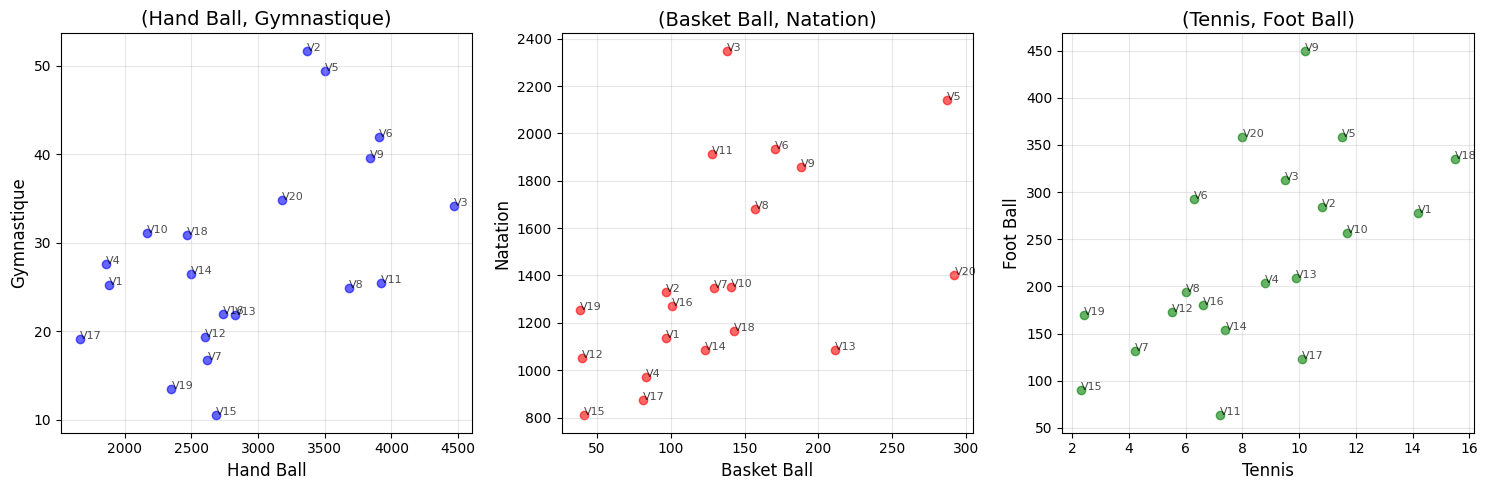

In [107]:
# Configuration des graphiques
plt.figure(figsize=(15, 5))

# (X1, X4) : Hand Ball vs Gymnastique
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 3], c='blue', alpha=0.6)
plt.xlabel("Hand Ball", fontsize=12)
plt.ylabel("Gymnastique", fontsize=12)
plt.title("(Hand Ball, Gymnastique)", fontsize=14)
plt.grid(True, alpha=0.3)

# Ajouter les labels des villes
for i, nom in enumerate(individus):
    plt.annotate(nom, (X[i, 0], X[i, 3]), fontsize=8, alpha=0.7)

# (X2, X5) : Basket Ball vs Natation
plt.subplot(1, 3, 2)
plt.scatter(X[:, 1], X[:, 4], c='red', alpha=0.6)
plt.xlabel("Basket Ball", fontsize=12)
plt.ylabel("Natation", fontsize=12)
plt.title("(Basket Ball, Natation)", fontsize=14)
plt.grid(True, alpha=0.3)

for i, nom in enumerate(individus):
    plt.annotate(nom, (X[i, 1], X[i, 4]), fontsize=8, alpha=0.7)

# (X3, X6) : Tennis vs Foot Ball
plt.subplot(1, 3, 3)
plt.scatter(X[:, 2], X[:, 5], c='green', alpha=0.6)
plt.xlabel("Tennis", fontsize=12)
plt.ylabel("Foot Ball", fontsize=12)
plt.title("(Tennis, Foot Ball)", fontsize=14)
plt.grid(True, alpha=0.3)

for i, nom in enumerate(individus):
    plt.annotate(nom, (X[i, 2], X[i, 5]), fontsize=8, alpha=0.7)

plt.tight_layout()
plt.show()

Commentaire :

- Si les points sont alignés dans une direction, il y a une corrélation.
- Si les points sont dispersés sans structure, les variables sont indépendantes.
- On peut aussi observer des outliers (villes atypiques).